x_train = [1. 2.]
y_train = [300. 500.]
x_train.shape: (2,)
Number of training examples is: 2
Number of training examples is: 2
(x^(0), y^(0)) = (1.0, 300.0)


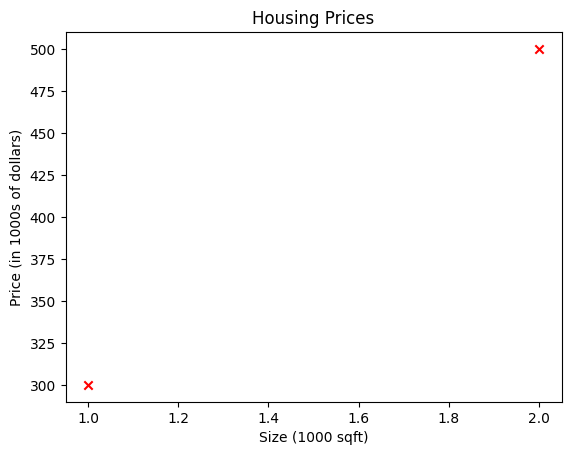

w: 200
b: 100


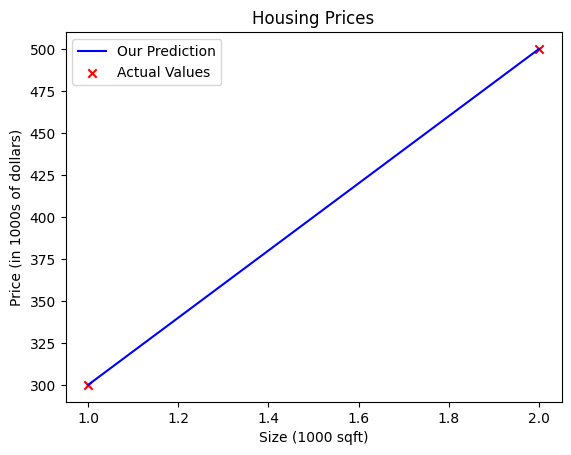

$340 thousand dollars


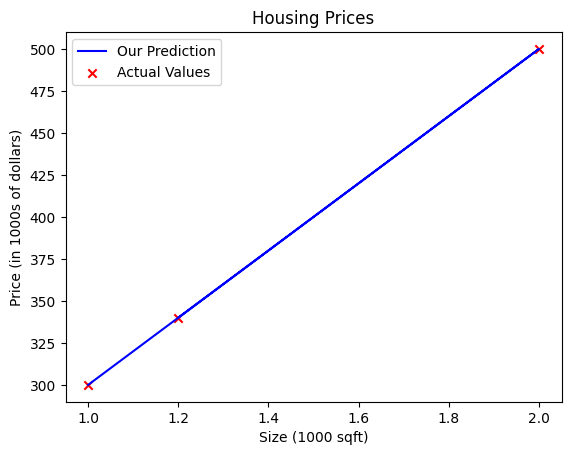

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Burada neden sorun oluyor Jupyter Notebook'ta?

# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")#1 boyutlu olan bir şeyde (1,) gibi basar 2. kısım olmaz
m = x_train.shape[0]#bu kullanım ile de o satırın içine girer ve elemana sayısına bakar.Shape sadece eleman sayısı ile ilgilenir.
print(f"Number of training examples is: {m}")

# m is the number of training examples
m = len(x_train)# yada bu da aynı mantıkdır.Bunda ama [] ile o satıra girmez eğer tek boyutlu ise.
print(f"Number of training examples is: {m}")

i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')#Görsel bir grafik oluşturmak için kullanılan bir fonksiyondur.
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0];
    f_wb = np.zeros(m)#m elemanlı bir dizi oluşturup içini 0 la doldurur.
    for i in range(m):
        f_wb[i] = w * x[i] + b #Diziye her eleman için atama yapar.
        
    return f_wb

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')#Çizgiyi çizer.

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')#Labela  yazılanlar legend ile eklenir

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

x_train=np.append(x_train,[x_i])
y_train=np.append(y_train,[cost_1200sqft])

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')#Çizgiyi çizer.

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')#Labela  yazılanlar legend ile eklenir

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples (Cost fonksiyonu)
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

    # Number of training examples(Gradient decent için türev ile w ve b leri değiştiriyoruz)
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db


    # An array to store cost J and w's at each iteration primarily for graphing later(Gradient Decent)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing